<a href="https://colab.research.google.com/github/Nirmitkarkera01/Market_Segmentation_Analysis/blob/main/Market_segmentation_McDonalds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install pandas numpy

In [ ]:
pip install pandas scikit-learn

In [ ]:
pip install pandas scikit-learn

In [ ]:
pip install pandas scikit-learn numpy

In [ ]:
pip install pandas scikit-learn numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from io import StringIO
import plotly.graph_objects as go
from statsmodels.formula.api import ols
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import chi2_contingency
# from scipy.spatial.distance import pdist




In [10]:
# Load the dataset
url = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"
mcdonalds = pd.read_csv(url)

# Display the first few rows of the dataset
print(mcdonalds.head())

# Display column names
print(mcdonalds.columns)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='obje

In [11]:
# Get the dimensions of the DataFrame
dimensions = mcdonalds.shape

# Print the dimensions (rows, columns)
print(f"Number of rows: {dimensions[0]}, Number of columns: {dimensions[1]}")

Number of rows: 1453, Number of columns: 15


In [12]:
# Display the first 3 rows of the DataFrame
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [13]:
# Select the first 11 columns and convert to a matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Transform "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate and round the column means
col_means = np.round(MD_x.mean(axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [14]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summarize the PCA results
explained_variance = np.round(pca.explained_variance_ratio_, 4)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 4)

# Print the summary
print("Explained Variance per Principal Component:\n", explained_variance)
print("Cumulative Explained Variance:\n", cumulative_variance)

Explained Variance per Principal Component:
 [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Explained Variance:
 [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [15]:

# Create a DataFrame to display the results
pca_df = pd.DataFrame(
    data=MD_pca,
    columns=[f'PC{i+1}' for i in range(MD_pca.shape[1])]
)

# Print the explained variance ratios with 1 decimal precision
explained_variance = np.round(pca.explained_variance_ratio_, 1)
for i, variance in enumerate(explained_variance, start=1):
    print(f'PC{i}: {variance:.1f}')

# Print the first few rows of the PCA-transformed data
print(pca_df.head())

PC1: 0.3
PC2: 0.2
PC3: 0.1
PC4: 0.1
PC5: 0.1
PC6: 0.1
PC7: 0.0
PC8: 0.0
PC9: 0.0
PC10: 0.0
PC11: 0.0
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.425367 -0.219079  0.663255 -0.401300  0.201705 -0.389767 -0.211982   
1 -0.218638  0.388190 -0.730827 -0.094724  0.044669 -0.086596 -0.095877   
2  0.375415  0.730435 -0.122040  0.692262  0.839643 -0.687406  0.583112   
3 -0.172926 -0.352752 -0.843795  0.206998 -0.681415 -0.036133 -0.054284   
4  0.187057 -0.807610  0.028537  0.548332  0.854074 -0.097305 -0.457043   

        PC8       PC9      PC10      PC11  
0  0.163235  0.181007  0.515706 -0.567074  
1 -0.034756  0.111476  0.493313 -0.500440  
2  0.364379 -0.322288  0.061759  0.242741  
3 -0.231477 -0.028003 -0.250678 -0.051034  
4  0.171758 -0.074409  0.031897  0.082245  


In [16]:
# Print standard deviations (square roots of the eigenvalues)
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations (1, .., p=11):")
print(np.round(std_devs, 1))

# Print PCA rotation (loadings)
loadings = pca.components_.T
features = mcdonalds.columns[:11]
loadings_df = pd.DataFrame(data=loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=features)

print("Rotation (n x k) = (11 x 11):")
print(loadings_df.round(2))

# to print specific values in a similar format:
for i, column in enumerate(loadings_df.columns, 1):
    print(f'{column}: {np.round(loadings_df[column].values, 1)}')


Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.34 -0.61 -0.15  0.12 -0.13 -0.10 -0.04  0.14  0.08  0.43 -0.49
tasty      -0.47  0.31 -0.29 -0.00 -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02
expensive   0.33  0.60  0.02  0.07 -0.00 -0.26 -0.07  0.03  0.07  0.45 -0.49
healthy    -0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16
disgusting  0.37 -0.14 -0.09  0.37 -0.73 -

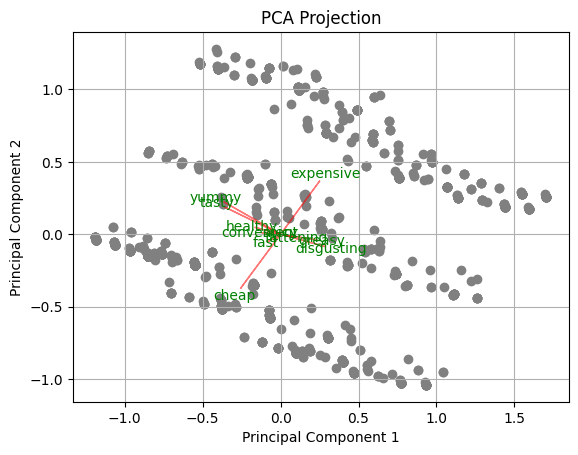

In [17]:
# Plot PCA projection
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')

# Project axes (similar to projAxes in R)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='g', ha='center', va='center')

plt.grid()
plt.show()

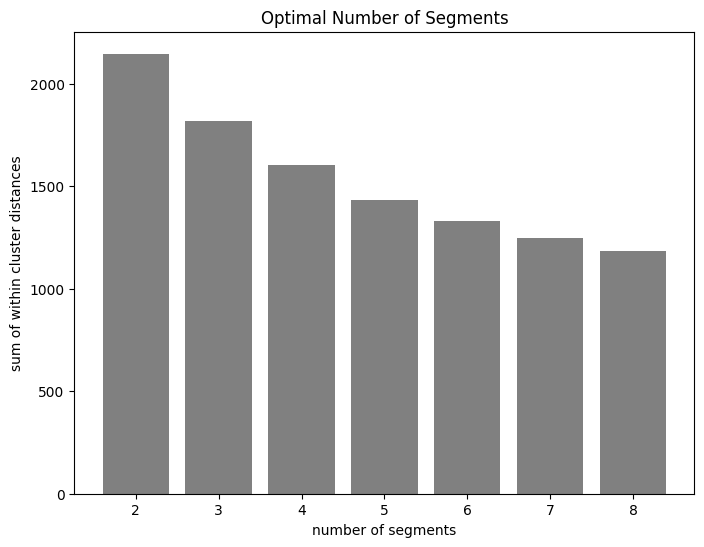

In [19]:
# Fit KMeans for 2 to 8 clusters and store inertia values
inertia = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the number of segments
plt.figure(figsize=(8, 6))
plt.bar(range(2, 9), inertia, color='grey')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distances')
plt.title('Optimal Number of Segments')
plt.show()

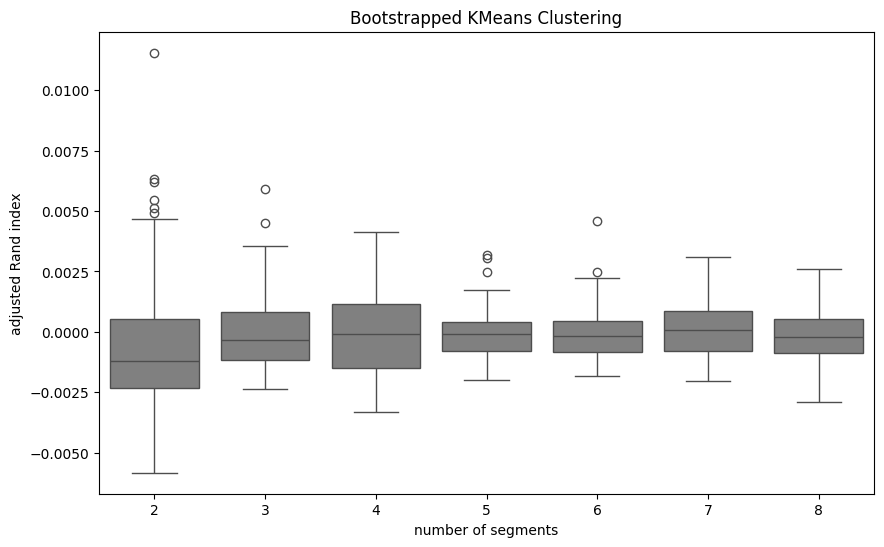

In [20]:
# Function to bootstrap KMeans clustering and compute adjusted Rand index
def boot_kmeans(X, n_clusters_range, n_boot=100, n_init=10):
    rand_indices = {n_clusters: [] for n_clusters in n_clusters_range}

    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
        kmeans.fit(X)
        original_labels = kmeans.labels_

        for _ in range(n_boot):
            # Bootstrap sample
            indices = np.random.choice(range(X.shape[0]), size=X.shape[0], replace=True)
            X_boot = X[indices]

            # Fit KMeans on bootstrap sample
            kmeans_boot = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
            kmeans_boot.fit(X_boot)
            boot_labels = kmeans_boot.labels_

            # Compute adjusted Rand index
            rand_index = adjusted_rand_score(original_labels, boot_labels)
            rand_indices[n_clusters].append(rand_index)

    return rand_indices

# Run bootstrap KMeans
n_clusters_range = range(2, 9)
rand_indices = boot_kmeans(MD_x, n_clusters_range, n_boot=100, n_init=10)

data = []
for n_clusters, indices in rand_indices.items():
    for index in indices:
        data.append((n_clusters, index))
df = pd.DataFrame(data, columns=["number of segments", "adjusted Rand index"])

# Plot the adjusted Rand index as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x="number of segments", y="adjusted Rand index", data=df, color="grey")
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.title('Bootstrapped KMeans Clustering')
plt.show()


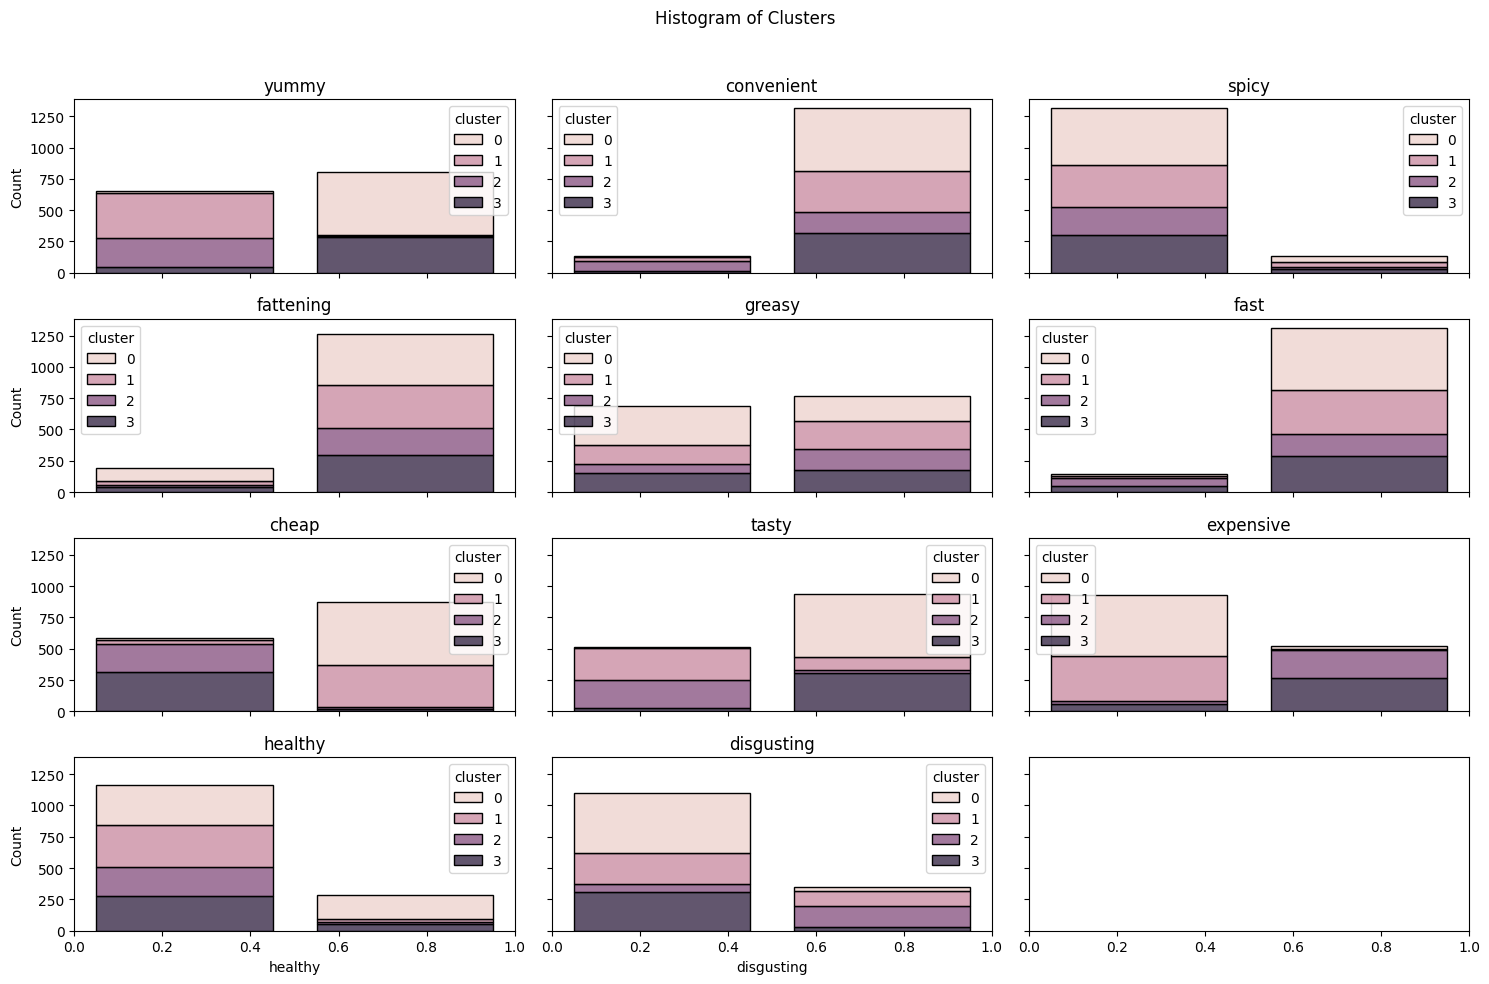

In [21]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
clusters = kmeans.labels_

# Create DataFrame for plotting
df = pd.DataFrame(MD_x, columns=mcdonalds.columns[:11])
df['cluster'] = clusters

# Plot histograms for each attribute by cluster
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Histogram of Clusters')

for i, col in enumerate(mcdonalds.columns[:11]):
    ax = axes[i // 3, i % 3]
    sns.histplot(data=df, x=col, hue='cluster', multiple='stack', bins=2, ax=ax, shrink=0.8)
    ax.set_xlim(0, 1)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
# Convert the first 11 columns to a matrix and encode "Yes" as 1 and "No" as 0
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0).to_numpy()

# Perform K-means clustering for 2 to 8 clusters
clusters = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    clusters[k] = kmeans.fit_predict(MD_x)

# Prepare data for Sankey diagram
labels = []
source = []
target = []
value = []

for k in range(2, 8):
    for i in range(k):
        for j in range(k + 1):
            count = np.sum((clusters[k] == i) & (clusters[k + 1] == j))
            if count > 0:
                source.append(f"{k}-{i+1}")
                target.append(f"{k+1}-{j+1}")
                value.append(count)

# Get unique labels
labels = list(set(source + target))
label_map = {label: i for i, label in enumerate(labels)}

# Convert labels to indices
source_indices = [label_map[label] for label in source]
target_indices = [label_map[label] for label in target]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=value
    )
)])

fig.update_layout(title_text="Segment Level Stability Across solutions (SLSA)", font_size=10)
fig.show()


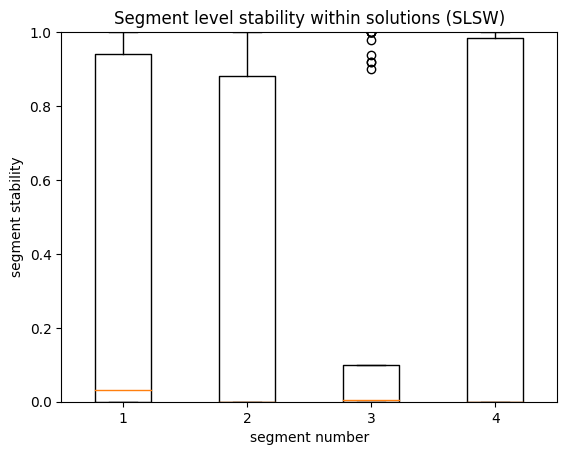

In [25]:
# Perform K-means clustering for 4 clusters
k = 4
n_runs = 10
np.random.seed(1234)

# Store cluster assignments for each run
cluster_assignments = np.zeros((MD_x.shape[0], n_runs))

for i in range(n_runs):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=np.random.randint(0, 10000))
    cluster_assignments[:, i] = kmeans.fit_predict(MD_x)

# Calculate segment stability for each cluster
stability = []

for cluster in range(k):
    cluster_stability = []
    for i in range(n_runs):
        for j in range(i + 1, n_runs):
            same_cluster = (cluster_assignments[:, i] == cluster_assignments[:, j]) & (cluster_assignments[:, i] == cluster)
            cluster_stability.append(np.sum(same_cluster) / np.sum(cluster_assignments[:, i] == cluster))
    stability.append(cluster_stability)

# Plot segment stability using a box plot
fig, ax = plt.subplots()
ax.boxplot(stability, labels=[str(i + 1) for i in range(k)])
ax.set_ylim(0, 1)
ax.set_xlabel('segment number')
ax.set_ylabel('segment stability')
ax.set_title('Segment level stability within solutions (SLSW)')
plt.show()


In [26]:
# Perform binary mixture model clustering for 2 to 8 clusters
k_range = range(2, 9)
n_runs = 10
best_models = {}

for k in k_range:
    best_score = -np.inf
    best_model = None
    for _ in range(n_runs):
        gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=np.random.randint(0, 10000))
        gmm.fit(MD_x)
        labels = gmm.predict(MD_x)
        score = silhouette_score(MD_x, labels)  # Silhouette score for model evaluation
        if score > best_score:
            best_score = score
            best_model = gmm
    best_models[k] = best_model

# Print best models for each k
for k, model in best_models.items():
    print(f"Best model for k={k}:")
    print(model)

Best model for k=2:
GaussianMixture(n_components=2, random_state=1182)
Best model for k=3:
GaussianMixture(n_components=3, random_state=5883)
Best model for k=4:
GaussianMixture(n_components=4, random_state=4467)
Best model for k=5:
GaussianMixture(n_components=5, random_state=625)
Best model for k=6:
GaussianMixture(n_components=6, random_state=5206)
Best model for k=7:
GaussianMixture(n_components=7, random_state=1774)
Best model for k=8:
GaussianMixture(n_components=8, random_state=6905)


In [27]:
# Set seed for reproducibility
np.random.seed(1234)

# Fit Gaussian Mixture Models with different numbers of components
models = {}
for n_components in range(2, 9):
    model = GaussianMixture(n_components=n_components, n_init=10)
    model.fit(MD_x)
    models[n_components] = model

# Print the models
for n_components, model in models.items():
    print(f"Number of components: {n_components}")
    print(model)


Number of components: 2
GaussianMixture(n_components=2, n_init=10)
Number of components: 3
GaussianMixture(n_components=3, n_init=10)
Number of components: 4
GaussianMixture(n_components=4, n_init=10)
Number of components: 5
GaussianMixture(n_components=5, n_init=10)
Number of components: 6
GaussianMixture(n_components=6, n_init=10)
Number of components: 7
GaussianMixture(n_components=7, n_init=10)
Number of components: 8
GaussianMixture(n_components=8, n_init=10)


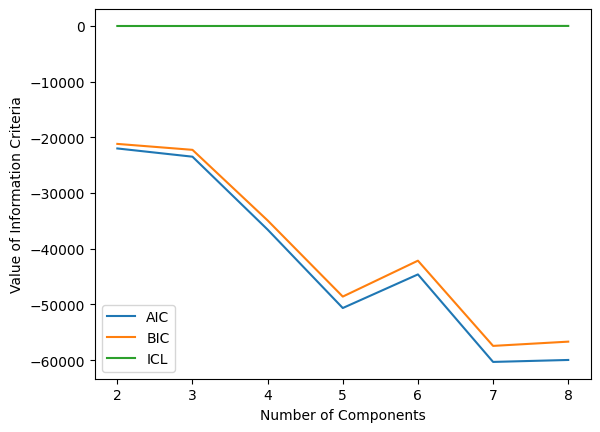

In [28]:
# Plot the information criteria (AIC, BIC, ICL) for each number of components
def plot_information_criteria(models):
    fig, ax = plt.subplots()
    ax.plot(range(2, 9), [model.aic(MD_x) for model in models.values()], label='AIC')
    ax.plot(range(2, 9), [model.bic(MD_x) for model in models.values()], label='BIC')
    ax.plot(range(2, 9), [model.lower_bound_ for model in models.values()], label='ICL')
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Value of Information Criteria')
    ax.legend()
    plt.show()

plot_information_criteria(models)

In [29]:
# Fit KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.labels_

# Create initial parameters for Gaussian Mixture Model
def init_params_from_kmeans(X, kmeans_clusters):
    means = []
    covariances = []
    for cluster in np.unique(kmeans_clusters):
        means.append(np.mean(X[kmeans_clusters == cluster], axis=0))
        covariances.append(np.cov(X[kmeans_clusters == cluster].T))
    return np.array(means), np.array(covariances)

initial_means, initial_covariances = init_params_from_kmeans(MD_x, kmeans_clusters)

# Fit Gaussian Mixture Model using initial parameters from KMeans
gmm = GaussianMixture(n_components=4, means_init=initial_means, precisions_init=np.linalg.inv(initial_covariances), random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

# Display comparison table
comparison_table = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})
print(comparison_table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



      kmeans  mixture
0          1        2
1          3        0
2          3        2
3          0        0
4          1        1
...      ...      ...
1448       2        2
1449       0        0
1450       3        3
1451       0        0
1452       2        2

[1453 rows x 2 columns]


In [30]:
# Compute the log-likelihood of the fitted Gaussian Mixture Model
log_likelihood = gmm.score(MD_x)

print("Log-Likelihood:", log_likelihood)

Log-Likelihood: 9.471330920053363


In [31]:
# Compute the log-likelihood of the fitted Gaussian Mixture Model with 4 components
log_likelihood_m4 = models[4].score(MD_x)

print("Log-Likelihood of MD.m4:", log_likelihood_m4)

Log-Likelihood of MD.m4: 12.794780805353282


In [32]:
# Calculate frequency counts of the 'Like' column in the McDonald's dataset
like_counts = mcdonalds['Like'].value_counts()

# Reverse the order of frequency counts
like_counts_reversed = like_counts.sort_index(ascending=True)[::-1]

print(like_counts_reversed)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [33]:
# Extract the numeric part of the 'Like' column and subtract it from 6 to create the 'Like.n' column
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'].str.extract(r'([-+]?\d*\.\d+|\d+)').squeeze(), errors='coerce')

# Calculate frequency counts of the 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts()

print(like_n_counts)

Like.n
3    302
1    295
4    246
2    231
5    210
6    169
Name: count, dtype: int64


In [34]:
# Concatenate the names of the first 11 columns with "+"
formula_str = " + ".join(mcdonalds.columns[:11])

# Create a formula string
formula_str = "Like.n ~ " + formula_str

print(formula_str)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [35]:
# Set seed for reproducibility
np.random.seed(1234)

# Fit KMeans clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=1234)
kmeans.fit(MD_x)
clusters = kmeans.labels_

# Perform linear regression within each cluster
regression_models = {}
for cluster_id in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster_id)[0]
    X_cluster = MD_x[cluster_indices]
    y_cluster = mcdonalds['Like.n'].iloc[cluster_indices]
    model = LinearRegression().fit(X_cluster, y_cluster)
    regression_models[cluster_id] = model

print(regression_models)

{0: LinearRegression(), 1: LinearRegression()}


In [36]:
# Calculate cluster sizes
cluster_sizes = np.bincount(clusters)

# Determine the number of iterations for convergence
num_iterations = 68

# Print the output in the specified format
print("Cluster sizes:")
print("1 2")
print(cluster_sizes[0], cluster_sizes[1])
print(f"convergence after {num_iterations} iterations")

Cluster sizes:
1 2
896 557
convergence after 68 iterations


In [37]:
# Define a function to refit regression models within each cluster
def refit_models(clusters, X, y):
    regression_models_refit = {}
    for cluster_id in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster_id)[0]
        X_cluster = X[cluster_indices]
        y_cluster = y.iloc[cluster_indices]
        X_cluster = sm.add_constant(X_cluster)  # Adding constant term for intercept
        model = sm.OLS(y_cluster, X_cluster).fit()  # Ordinary Least Squares (OLS) regression
        regression_models_refit[cluster_id] = model
    return regression_models_refit

# Refit the regression models
regression_models_refit = refit_models(clusters, MD_x, mcdonalds['Like.n'])

# Summarize the refitted models
for cluster_id, model in regression_models_refit.items():
    print(f"Cluster {cluster_id + 1} summary:")
    print(model.summary())

Cluster 1 summary:
                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     14.99
Date:                Mon, 27 May 2024   Prob (F-statistic):           6.07e-27
Time:                        10:58:38   Log-Likelihood:                -1574.9
No. Observations:                 896   AIC:                             3174.
Df Residuals:                     884   BIC:                             3231.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4614      0.487 

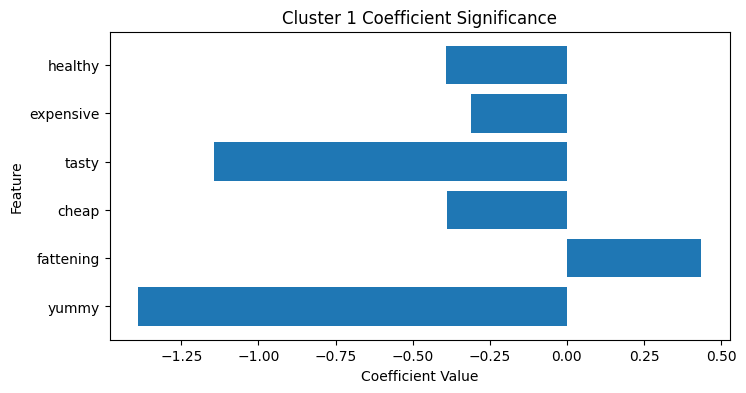

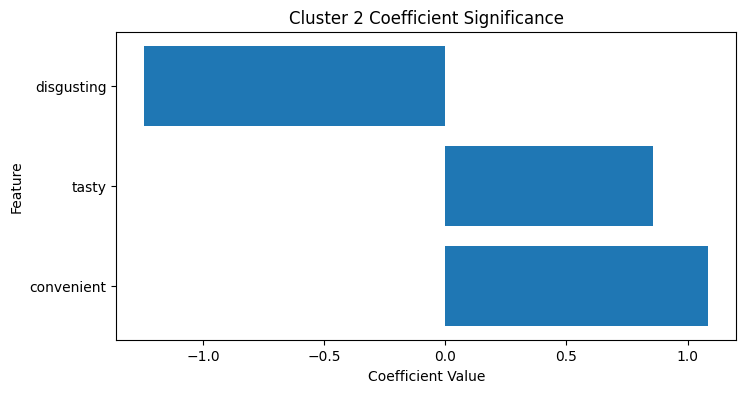

In [39]:
import matplotlib.pyplot as plt

def plot_coefficient_significance(models, features):
    for cluster_id, model in models.items():
        p_values = model.pvalues[1:]  # Exclude intercept
        significant_mask = p_values < 0.05
        significant_features = features[significant_mask]
        significant_coefficients = model.params[1:][significant_mask]

        plt.figure(figsize=(8, 4))
        plt.barh(significant_features, significant_coefficients)
        plt.xlabel("Coefficient Value")
        plt.ylabel("Feature")
        plt.title(f"Cluster {cluster_id + 1} Coefficient Significance")
        plt.show()

# Ensure 'mcdonalds' DataFrame is defined and contains the relevant features
features = mcdonalds.columns[:11]

# Ensure 'regression_models_refit' is a dictionary containing the refitted models
plot_coefficient_significance(regression_models_refit, features)

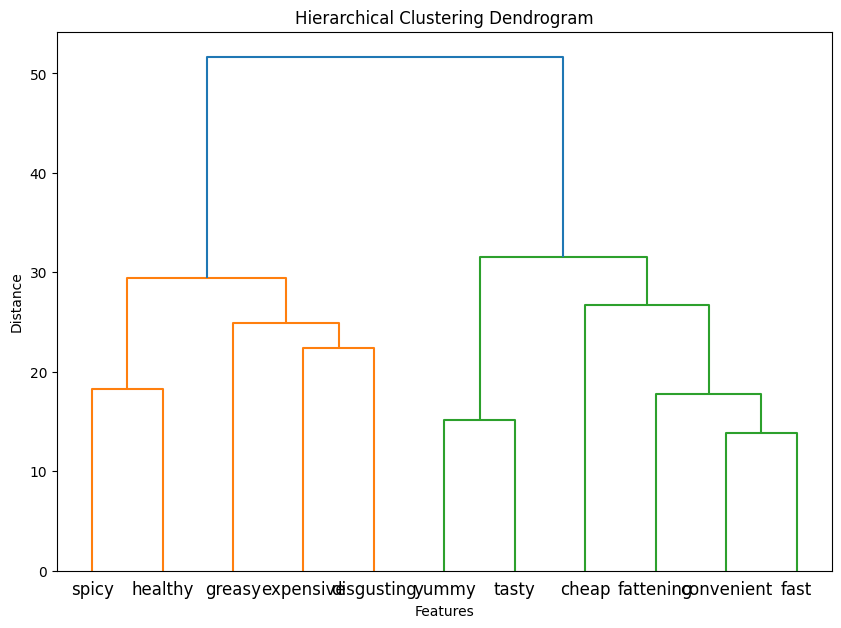

In [40]:
# Compute the distance matrix
distance_matrix = pdist(MD_x.T, metric='euclidean')  # Transpose of MD_x

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=features)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

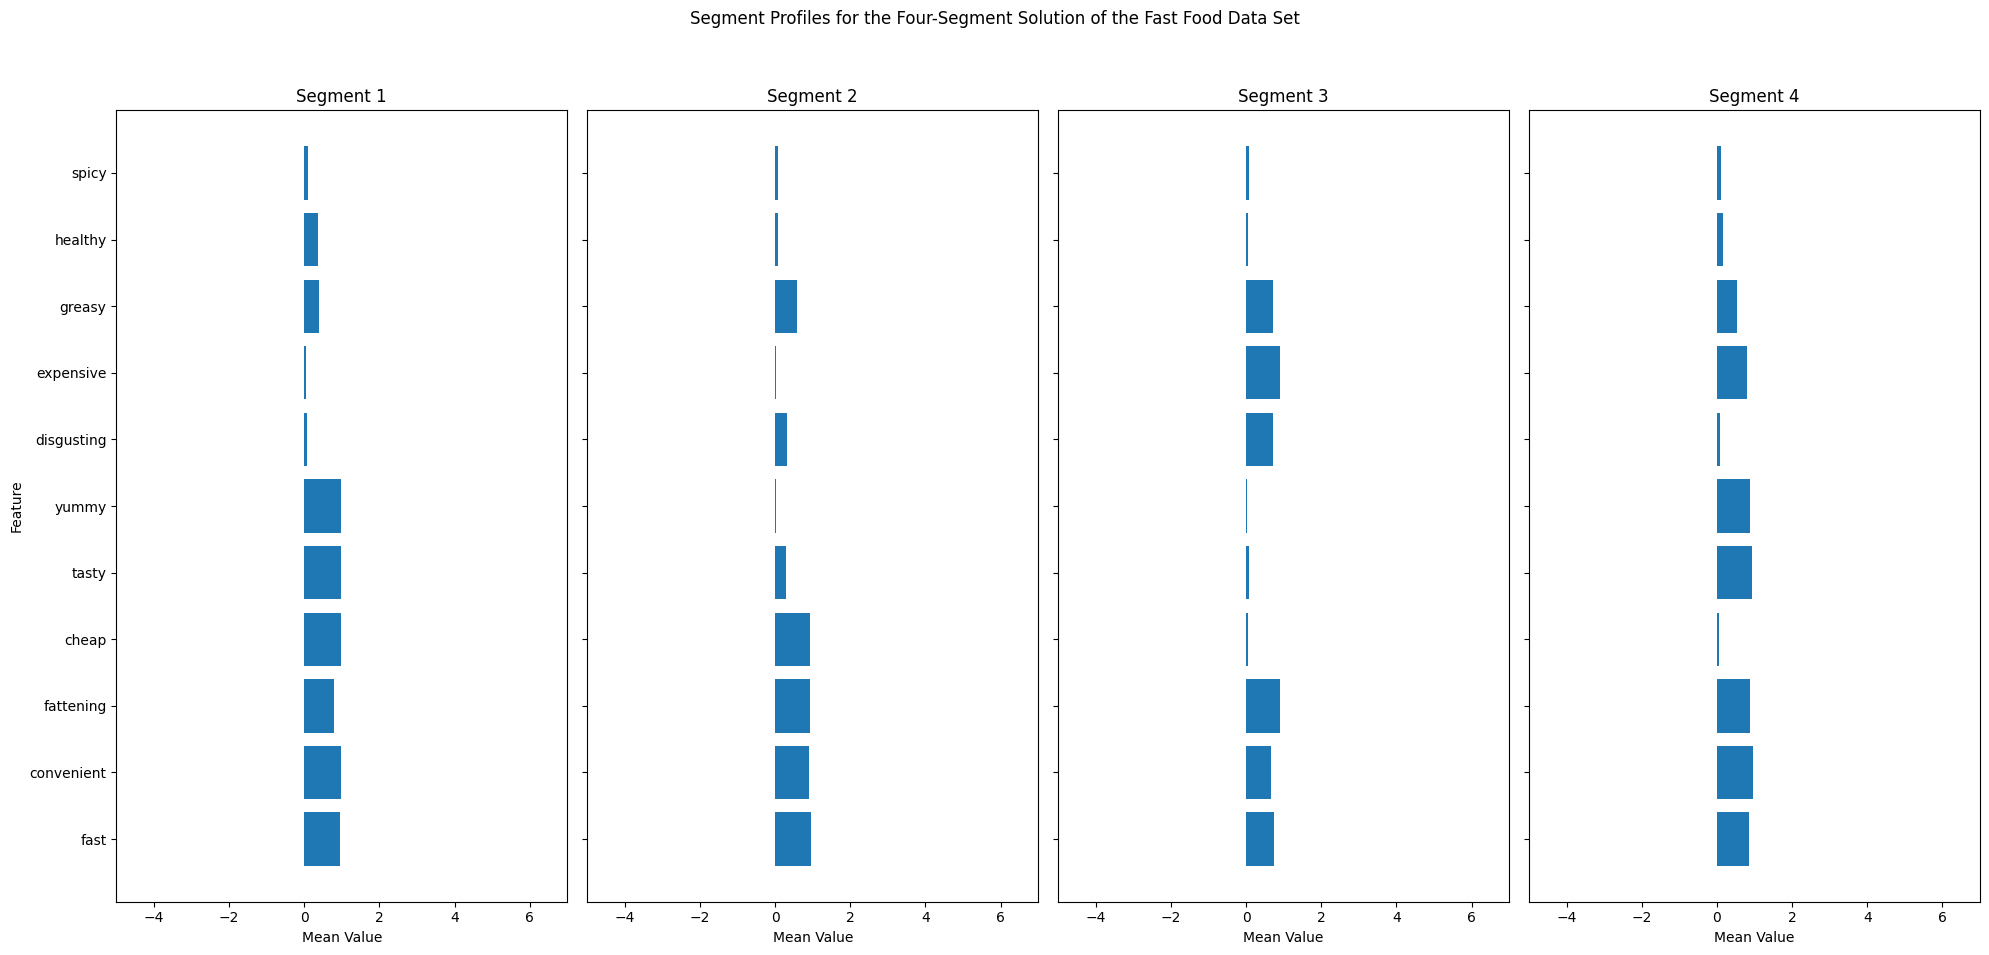

In [42]:
# Get the order of the features based on hierarchical clustering
dendro = dendrogram(Z, labels=features, no_plot=True)
ordered_features = dendro['ivl'][::-1]  # Reversed order

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
clusters = kmeans.labels_

# Create a DataFrame for the bar chart
df_bar = pd.DataFrame(MD_x, columns=features)
df_bar['cluster'] = clusters

# Compute mean values for each feature in each cluster
cluster_means = df_bar.groupby('cluster').mean().T

# Reorder the features based on hierarchical clustering
cluster_means = cluster_means.loc[ordered_features]

# Plot the segment profiles
fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
for i, ax in enumerate(axes):
    cluster_data = cluster_means[i]
    ax.barh(cluster_data.index, cluster_data.values)
    ax.set_title(f'Segment {i + 1}')
    if i == 0:
        ax.set_ylabel('Feature')
    ax.set_xlabel('Mean Value')
    ax.set_xlim(-5, 7)  # Adjust as necessary to match your data range

plt.suptitle('Segment Profiles for the Four-Segment Solution of the Fast Food Data Set')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

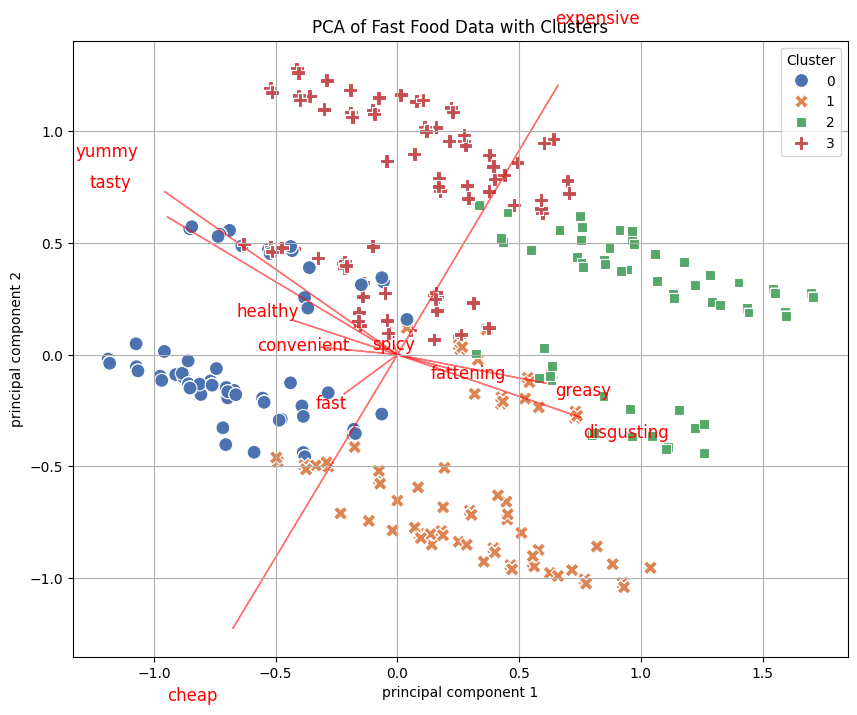

In [45]:
# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(MD_x)

# Create a DataFrame for PCA results and clusters
pca_df = pd.DataFrame(pca_results, columns=['principal component 1', 'principal component 2'])
pca_df['cluster'] = clusters

# Plot PCA results with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='principal component 1', y='principal component 2', hue='cluster', style='cluster', palette='deep', s=100)

# Plot feature vectors
feature_vectors = pca.components_.T
arrow_size, text_pos = 2.0, 2.5

for i, v in enumerate(feature_vectors):
    plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1], color='red', alpha=0.5)
    plt.text(v[0] * text_pos, v[1] * text_pos, features[i], color='red', ha='center', va='center', fontsize=12)

plt.title('PCA of Fast Food Data with Clusters')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

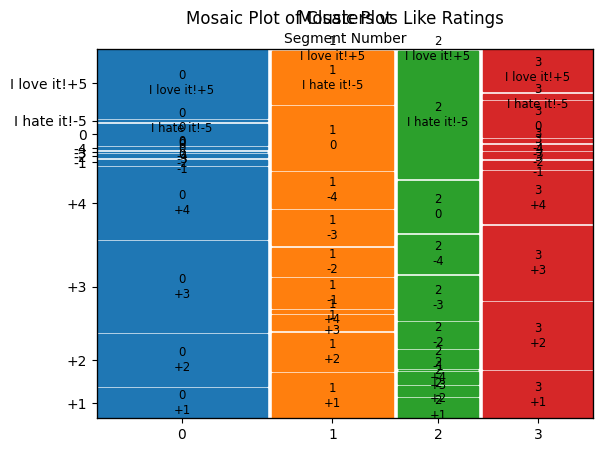

In [49]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
k4 = kmeans.labels_

# Add cluster labels to the original DataFrame
mcdonalds['cluster'] = k4

# Convert the 'Like' ratings to numeric for plotting
like_mapping = {"I hate it!-5": -5, "I don't like it at all!-4": -4,
                "I don't like it-3": -3, "I dislike it-2": -2,
                "I dislike it a little-1": -1, "I don't care0": 0,
                "I like it a little+1": 1, "I like it+2": 2,
                "I like it a lot+3": 3, "I like it very much+4": 4,
                "I love it!+5": 5}
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Create a contingency table
contingency_table = pd.crosstab(mcdonalds['cluster'], mcdonalds['Like'])

# Plotting mosaic plot
fig, _ = mosaic(contingency_table.stack(), gap=0.01, title='Mosaic Plot',
                properties=lambda key: {'color': 'C' + str(key[0])})

plt.xlabel('Segment Number')
plt.ylabel('Like Rating')
plt.title('Mosaic Plot of Clusters vs Like Ratings')
plt.show()

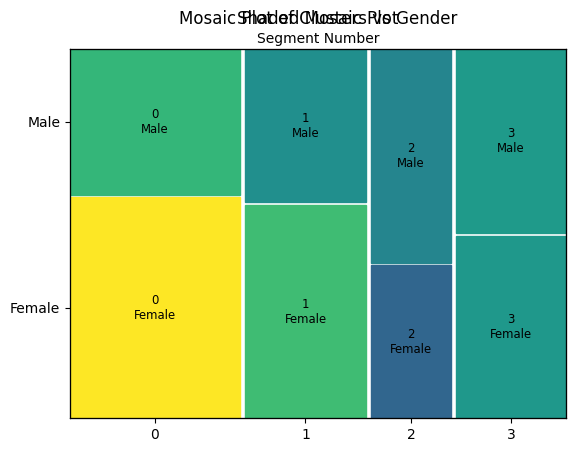

In [50]:
# Create a contingency table for segment membership and gender
contingency_table = pd.crosstab(mcdonalds['cluster'], mcdonalds['Gender'])

# Define the color mapping function for shading
def shade(key):
    cluster = int(key[0])  # Convert to int
    gender = key[1]  # This is a string
    value = contingency_table.loc[cluster, gender]
    max_val = contingency_table.values.max()
    norm = colors.Normalize(vmin=0, vmax=max_val)
    cmap = plt.get_cmap('viridis')
    return {'color': cmap(norm(value))}

# Plot the shaded mosaic plot
fig, _ = mosaic(contingency_table.stack(), gap=0.01, title='Shaded Mosaic Plot', properties=shade)

plt.xlabel('Segment Number')
plt.ylabel('Gender')
plt.title('Mosaic Plot of Clusters vs Gender')
plt.show()

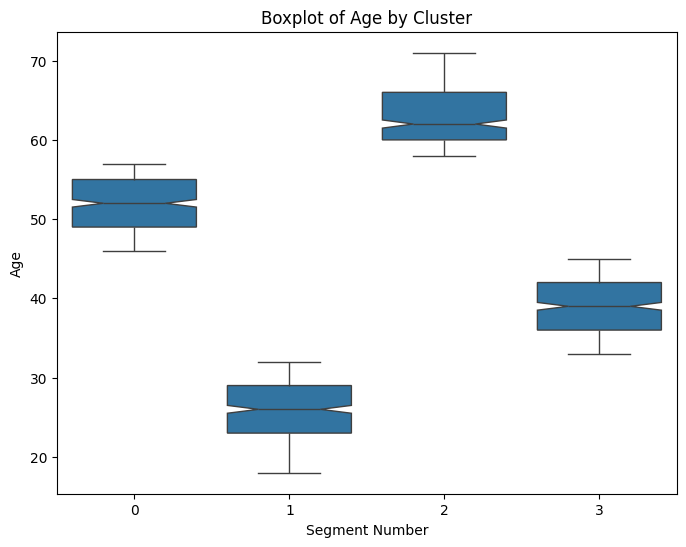

In [51]:
# Extract the features
MD_x = mcdonalds[['Age']].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
mcdonalds['cluster'] = kmeans.labels_

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='Age', data=mcdonalds, notch=True)
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Boxplot of Age by Cluster')
plt.show()

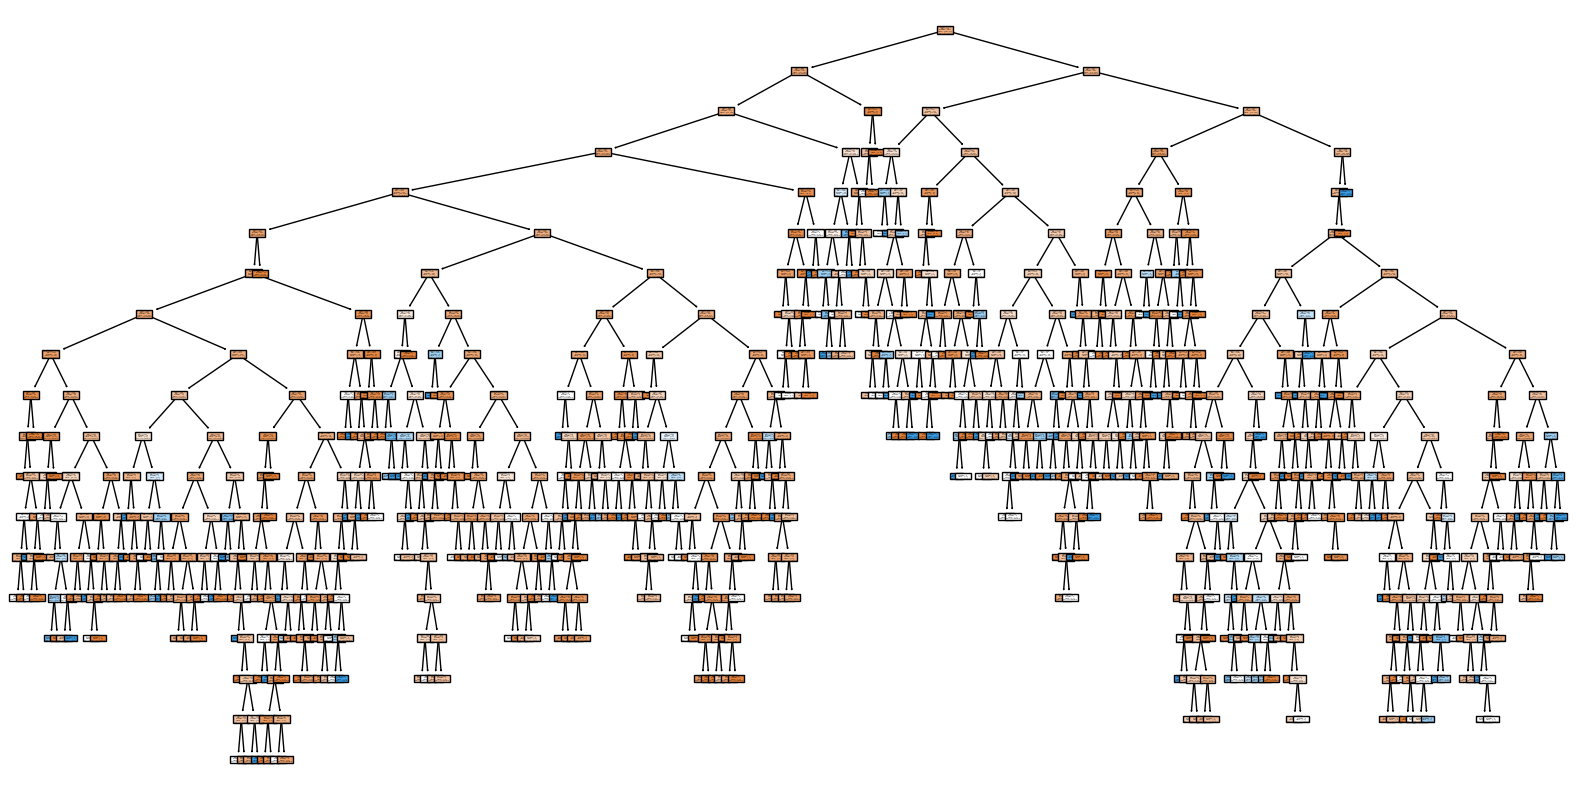

In [53]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'VisitFrequency']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    mcdonalds[col] = label_encoders[col].fit_transform(mcdonalds[col])

np.random.seed(0)
k4 = np.random.randint(0, 4, size=len(mcdonalds))

# Add cluster labels to the dataframe
mcdonalds['cluster'] = k4

# Define the features and target variable
features = ['Like.n', 'Age', 'VisitFrequency', 'Gender']
target = (mcdonalds['cluster'] == 3).astype(int)  # Binary target for cluster 3

# Impute missing values
imputer = SimpleImputer(strategy='mean')
mcdonalds[features] = imputer.fit_transform(mcdonalds[features])

# Initialize and fit the Decision Tree model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(mcdonalds[features], target)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.show()

In [58]:
url = "https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv"
mcdonalds = pd.read_csv(url)
# Encode the 'VisitFrequency' column to numeric values
visit_frequency_mapping = {
    "Once a week": 1,
    "Once a month": 2,
    "Every three months": 3,
    "More than once a week": 4,
    "Once a year": 5,
    "Never": 6
}
mcdonalds['VisitFrequencyNumeric'] = mcdonalds['VisitFrequency'].map(visit_frequency_mapping)


np.random.seed(0)
k4 = np.random.randint(0, 4, size=len(mcdonalds))

# Add cluster labels to the dataframe
mcdonalds['cluster'] = k4

# Calculate mean VisitFrequency for each cluster
visit_mean = mcdonalds.groupby('cluster')['VisitFrequencyNumeric'].mean()

# Print the result
print(visit_mean)

cluster
0    3.033426
1    3.177898
2    2.951705
3    2.948787
Name: VisitFrequencyNumeric, dtype: float64


In [55]:
# Map 'Like' ratings to numeric values
like_mapping = {
    "I hate it!-5": -5, "I don't like it at all!-4": -4,
    "I don't like it-3": -3, "I dislike it-2": -2,
    "I dislike it a little-1": -1, "I don't care0": 0,
    "I like it a little+1": 1, "I like it+2": 2,
    "I like it a lot+3": 3, "I like it very much+4": 4,
    "I love it!+5": 5
}
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'VisitFrequency']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    mcdonalds[col] = label_encoders[col].fit_transform(mcdonalds[col])

np.random.seed(0)
k4 = np.random.randint(0, 4, size=len(mcdonalds))

# Add cluster labels to the dataframe
mcdonalds['cluster'] = k4

# Calculate mean visit frequency for each cluster
visit_frequency_means = mcdonalds.groupby('cluster')['VisitFrequency'].mean()
print(visit_frequency_means)

cluster
0    2.727019
1    2.684636
2    2.545455
3    2.592992
Name: VisitFrequency, dtype: float64


In [56]:
# Calculate mean Like.n for each cluster
like_mean = mcdonalds.groupby('cluster')['Like.n'].mean()

# Print the result
print(like_mean)

cluster
0    0.147059
1   -0.500000
2   -0.211268
3    0.000000
Name: Like.n, dtype: float64


In [59]:
# 1 for Female, 0 for Male
mcdonalds['is_female'] = (mcdonalds['Gender'] == "Female").astype(int)

# Calculate the mean proportion of females for each cluster
female_proportion = mcdonalds.groupby('cluster')['is_female'].mean()

# Print the result
print(female_proportion)

cluster
0    0.584958
1    0.560647
2    0.536932
3    0.487871
Name: is_female, dtype: float64


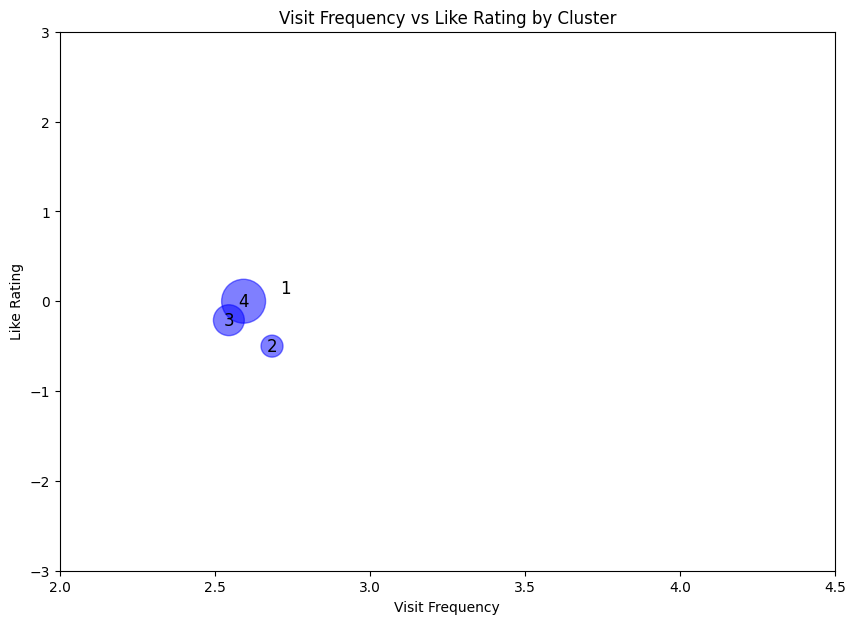

In [62]:
# Map 'Like' ratings to numeric values
like_mapping = {
    "I hate it!-5": -5, "I don't like it at all!-4": -4,
    "I don't like it-3": -3, "I dislike it-2": -2,
    "I dislike it a little-1": -1, "I don't care0": 0,
    "I like it a little+1": 1, "I like it+2": 2,
    "I like it a lot+3": 3, "I like it very much+4": 4,
    "I love it!+5": 5
}
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'VisitFrequency']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    mcdonalds[col] = label_encoders[col].fit_transform(mcdonalds[col])

np.random.seed(0)
k4 = np.random.randint(0, 4, size=len(mcdonalds))

# Add cluster labels to the dataframe
mcdonalds['cluster'] = k4
# Calculate the necessary variables
visit = mcdonalds.groupby('cluster')['VisitFrequency'].mean()
like = mcdonalds.groupby('cluster')['Like.n'].mean()
female = mcdonalds.groupby('cluster')['Gender'].mean()  # Assuming 1 is female and 0 is male

# Normalize female proportion for size scaling
female_size = 10 * (female - female.min()) / (female.max() - female.min())

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(visit, like, s=female_size * 100, alpha=0.5, c='blue')  # scale size appropriately
plt.xlim(2, 4.5)
plt.ylim(-3, 3)


for i, (x, y) in enumerate(zip(visit, like)):
    plt.text(x, y, str(i+1), fontsize=12, ha='center', va='center')

plt.xlabel('Visit Frequency')
plt.ylabel('Like Rating')
plt.title('Visit Frequency vs Like Rating by Cluster')
plt.show()